# 가스 공급량 수요예측 모델 개발 공모전

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import datetime, timedelta

# 1.데이터 불러오기

In [2]:
df = pd.read_csv('C:/Users/Administrator/데이터모음/가스공급량/한국가스공사_시간별 공급량_20181231.csv', encoding = 'utf-8')

In [3]:
weather13 = pd.read_csv('C:/Users/Administrator/데이터모음/가스공급량/2013기상청.csv', encoding = 'utf-8')
weather14 = pd.read_csv('C:/Users/Administrator/데이터모음/가스공급량/2014기상청.csv', encoding = 'utf-8')
weather15 = pd.read_csv('C:/Users/Administrator/데이터모음/가스공급량/2015기상청.csv', encoding = 'utf-8')
weather16 = pd.read_csv('C:/Users/Administrator/데이터모음/가스공급량/2016기상청.csv', encoding = 'utf-8')
weather17 = pd.read_csv('C:/Users/Administrator/데이터모음/가스공급량/2017기상청.csv', encoding = 'utf-8')
weather18 = pd.read_csv('C:/Users/Administrator/데이터모음/가스공급량/2018기상청.csv', encoding = 'utf-8')

In [4]:
df

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105
...,...,...,...,...
368083,2018-12-31,20,H,681.033
368084,2018-12-31,21,H,669.961
368085,2018-12-31,22,H,657.941
368086,2018-12-31,23,H,610.953


In [5]:
weather13

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),적설(cm),전운량(10분위),지면상태(지면상태코드),현상번호(국내식),지면온도(°C)
0,108,서울,2013-01-01 1:00,-8.5,NaN,4.0,57.0,1010.0,NaN,6.4,NaN,NaN,NaN,-3.4
1,108,서울,2013-01-01 2:00,-8.4,NaN,4.0,60.0,1009.4,NaN,6.4,NaN,NaN,NaN,-3.4
2,108,서울,2013-01-01 3:00,-8.1,NaN,3.4,58.0,1009.2,NaN,6.4,6.0,13.0,NaN,-3.4
3,108,서울,2013-01-01 4:00,-8.2,NaN,3.8,58.0,1008.2,NaN,6.4,6.0,NaN,NaN,-3.4
4,108,서울,2013-01-01 5:00,-8.2,NaN,4.4,61.0,1007.3,NaN,6.4,10.0,NaN,5.0,-3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,108,서울,2013-12-31 20:00,5.2,NaN,2.7,70.0,999.0,NaN,NaN,NaN,NaN,40.0,0.1
8756,108,서울,2013-12-31 21:00,4.9,NaN,3.9,64.0,999.6,NaN,NaN,6.0,1.0,40.0,0.1
8757,108,서울,2013-12-31 22:00,4.2,NaN,3.6,62.0,1000.4,NaN,NaN,NaN,NaN,40.0,0.1
8758,108,서울,2013-12-31 23:00,3.7,NaN,3.2,61.0,1001.2,NaN,NaN,NaN,NaN,40.0,0.1


# 2.데이터 확인하기

In [6]:
df.info()
print('-'*50)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   연월일     368088 non-null  object 
 1   시간      368088 non-null  int64  
 2   구분      368088 non-null  object 
 3   공급량     368088 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.2+ MB
--------------------------------------------------


연월일    0
시간     0
구분     0
공급량    0
dtype: int64

In [7]:
weather13.info()
print('-'*50)
weather13.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지점            8760 non-null   int64  
 1   지점명           8760 non-null   object 
 2   일시            8760 non-null   object 
 3   기온(°C)        8760 non-null   float64
 4   강수량(mm)       930 non-null    float64
 5   풍속(m/s)       8760 non-null   float64
 6   습도(%)         8760 non-null   float64
 7   현지기압(hPa)     8760 non-null   float64
 8   일조(hr)        4795 non-null   float64
 9   적설(cm)        1079 non-null   float64
 10  전운량(10분위)     6807 non-null   float64
 11  지면상태(지면상태코드)  1463 non-null   float64
 12  현상번호(국내식)     3395 non-null   float64
 13  지면온도(°C)      8757 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 958.2+ KB
--------------------------------------------------


지점                 0
지점명                0
일시                 0
기온(°C)             0
강수량(mm)         7830
풍속(m/s)            0
습도(%)              0
현지기압(hPa)          0
일조(hr)          3965
적설(cm)          7681
전운량(10분위)       1953
지면상태(지면상태코드)    7297
현상번호(국내식)       5365
지면온도(°C)           3
dtype: int64

In [8]:
weather13.info()
print('-'*50)
weather14.info()
print('-'*50)
weather15.info()
print('-'*50)
weather16.info()
print('-'*50)
weather17.info()
print('-'*50)
weather18.info()
print('-'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지점            8760 non-null   int64  
 1   지점명           8760 non-null   object 
 2   일시            8760 non-null   object 
 3   기온(°C)        8760 non-null   float64
 4   강수량(mm)       930 non-null    float64
 5   풍속(m/s)       8760 non-null   float64
 6   습도(%)         8760 non-null   float64
 7   현지기압(hPa)     8760 non-null   float64
 8   일조(hr)        4795 non-null   float64
 9   적설(cm)        1079 non-null   float64
 10  전운량(10분위)     6807 non-null   float64
 11  지면상태(지면상태코드)  1463 non-null   float64
 12  현상번호(국내식)     3395 non-null   float64
 13  지면온도(°C)      8757 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 958.2+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (t

# 3.데이터 합치기

In [9]:
#날씨 데이터 합치기

weather = pd.concat([weather13,weather14,weather15,weather16,weather17,weather18])
weather = weather.reset_index()

In [10]:
#필요없는 컬럼 삭제

weather = weather.drop(columns = ['index','지점','지점명'])

In [11]:
#결측치 0으로 대치
weather = weather.fillna(0)

In [12]:
#일시의 시간 표시 시간이라는 컬럼으로 빼기
from datetime import datetime


weather['일시'] = pd.to_datetime(weather['일시'])
weather['연월일'] = weather['일시'].dt.date
weather['시간'] = weather['일시'].dt.hour

In [13]:
#시간이 0 인거 24로 바꾸기
for i in tqdm(range(len(weather))):
    
    if weather['시간'][i] == 0:
        weather['시간'][i] = 24

  0%|                                                                                        | 0/52584 [00:00<?, ?it/s]<ipython-input-13-11f76a0debf5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['시간'][i] = 24
100%|█████████████████████████████████████████████████████████████████████████| 52584/52584 [00:01<00:00, 31921.35it/s]


In [14]:
weather['잡'] = 0

#시간이 24인거 하루 전으로 만들기
for i in tqdm(range(len(weather))):
    if weather['시간'][i] == 24:
        weather['잡'][i] = weather['일시'][i] +timedelta(days = -1)

#하루전으로 되돌린 날짜 연월일에 넣기
for x in tqdm(range(len(weather))):
    if weather['잡'][x] != 0:
        weather['연월일'][x] = str(weather['잡'][x])[:10]


weather = weather.drop(columns = '잡')

  0%|                                                                                        | 0/52584 [00:00<?, ?it/s]<ipython-input-14-b08108ef07ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['잡'][i] = weather['일시'][i] +timedelta(days = -1)
  0%|                                                                                        | 0/52584 [00:00<?, ?it/s]<ipython-input-14-b08108ef07ba>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['연월일'][x] = str(weather['잡'][x])[:10]
100%|█████████████████████████████████████████████████████████████████████████| 52584/52584 [00:02<00:00, 24568.53it/s]


In [15]:
#df데이타와 weather 데이터 합치기

df['연월일'] = df['연월일'].astype('str')
weather['연월일'] = weather['연월일'].astype('str')


df = pd.merge(df, weather, on = ['연월일','시간'], how = 'left')

In [16]:
#구분 기준으로 결측치 확인
for i in df['구분'].unique():
    a = df[df['구분'] == i]
    print('-'*25,i,'-'*25)
    print(a.isnull().sum())
    print('-'*50)

------------------------- A -------------------------
연월일             0
시간              0
구분              0
공급량             0
일시              0
기온(°C)          0
강수량(mm)         0
풍속(m/s)         0
습도(%)           0
현지기압(hPa)       0
일조(hr)          0
적설(cm)          0
전운량(10분위)       0
지면상태(지면상태코드)    0
현상번호(국내식)       0
지면온도(°C)        0
dtype: int64
--------------------------------------------------
------------------------- B -------------------------
연월일             0
시간              0
구분              0
공급량             0
일시              0
기온(°C)          0
강수량(mm)         0
풍속(m/s)         0
습도(%)           0
현지기압(hPa)       0
일조(hr)          0
적설(cm)          0
전운량(10분위)       0
지면상태(지면상태코드)    0
현상번호(국내식)       0
지면온도(°C)        0
dtype: int64
--------------------------------------------------
------------------------- C -------------------------
연월일             0
시간              0
구분              0
공급량             0
일시              0
기온(°C)          0
강수량(mm)         0
풍속(m/s) 

In [17]:
df

,연월일,시간,구분,공급량,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),적설(cm),전운량(10분위),지면상태(지면상태코드),현상번호(국내식),지면온도(°C)
0,2013-01-01,1,A,2497.129,2013-01-01 01:00:00,-8.5,0.0,4.0,57.0,1010.0,0.0,6.4,0.0,0.0,0.0,-3.4
1,2013-01-01,2,A,2363.265,2013-01-01 02:00:00,-8.4,0.0,4.0,60.0,1009.4,0.0,6.4,0.0,0.0,0.0,-3.4
2,2013-01-01,3,A,2258.505,2013-01-01 03:00:00,-8.1,0.0,3.4,58.0,1009.2,0.0,6.4,6.0,13.0,0.0,-3.4
3,2013-01-01,4,A,2243.969,2013-01-01 04:00:00,-8.2,0.0,3.8,58.0,1008.2,0.0,6.4,6.0,0.0,0.0,-3.4
4,2013-01-01,5,A,2344.105,2013-01-01 05:00:00,-8.2,0.0,4.4,61.0,1007.3,0.0,6.4,10.0,0.0,5.0,-3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368083,2018-12-31,20,H,681.033,2018-12-31 20:00:00,-3.7,0.0,0.8,39.0,1024.9,0.0,0.0,5.0,0.0,0.0,-3.0
368084,2018-12-31,21,H,669.961,2018-12-31 21:00:00,-4.6,0.0,1.1,44.0,1024.8,0.0,0.0,0.0,0.0,0.0,-4.1
368085,2018-12-31,22,H,657.941,2018-12-31 22:00:00,-5.4,0.0,1.3,46.0,1024.4,0.0,0.0,0.0,0.0,0.0,-5.0
368086,2018-12-31,23,H,610.953,2018-12-31 23:00:00,-5.2,0.0,1.6,47.0,1024.6,0.0,0.0,0.0,0.0,0.0,-5.1


# 4.그래프와 변수 확인하기

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/Hancom Gothic Regular.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


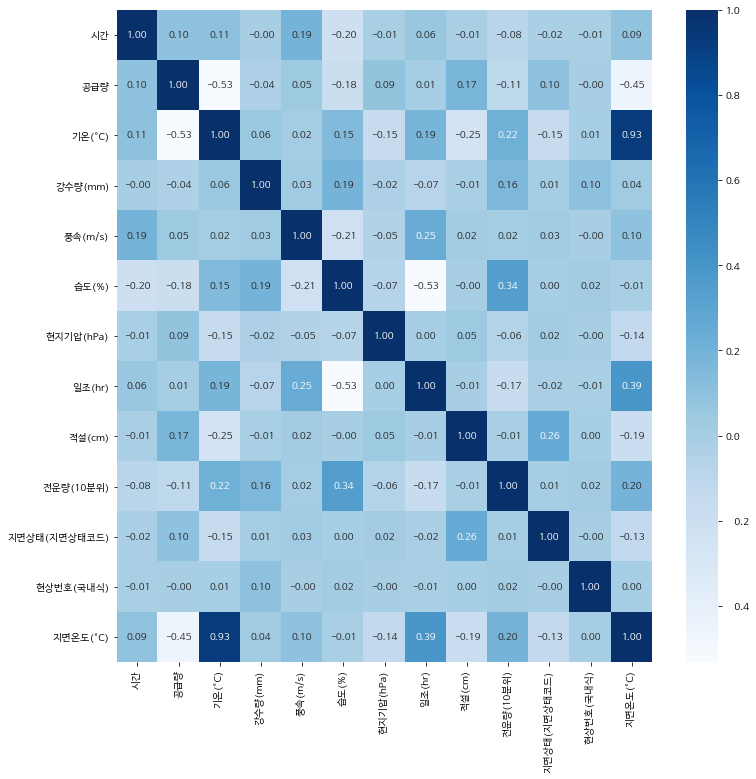

In [20]:
#상관계수 히트맵 그려보기

plt.figure(figsize=(12,12))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', cmap='Blues')

In [21]:
#문자열 변수인 '연월일',구분' 숫자형으로 변경
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['구분'] = label_encoder.fit_transform(df['구분'])
df['연월일'] = label_encoder.fit_transform(df['연월일'])

In [22]:
#기본 회귀식 돌리기
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X = df.drop(['일시','공급량'], axis = 1)
y = df['공급량']

sm_model = sm.OLS(y,X)
sm_model_fit = sm_model.fit()

In [23]:
sm_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    공급량   R-squared (uncentered):                   0.671
Model:                            OLS   Adj. R-squared (uncentered):              0.671
Method:                 Least Squares   F-statistic:                          5.371e+04
Date:                Mon, 08 Nov 2021   Prob (F-statistic):                        0.00
Time:                        17:18:33   Log-Likelihood:                     -2.9640e+06
No. Observations:              368088   AIC:                                  5.928e+06
Df Residuals:                  368074   BIC:                                  5.928e+06
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
연월일              0.0200      0.002      9.441      0.000       0.016       0.024
시간              21.4898      0.192    111.993      0.000      21.114      21.866
구분              27.1046      0.626     43.313      0.000      25.878      28.331
기온(°C)         -58.8491      0.370   -159.149      0.000     -59.574     -58.124
강수량(mm)         -2.2740      1.187     -1.915      0.055      -4.601       0.053
풍속(m/s)         -3.4000      1.021     -3.331      0.001      -5.400      -1.400
습도(%)           -0.5946      0.083     -7.128      0.000      -0.758      -0.431
현지기압(hPa)        1.1217      0.007    154.338      0.000       1.107       1.136
일조(hr)         149.2585      4.315     34.595      0.000     140.802     157.715
적설(cm)          27.5841      1.239     22.272      0.000      25.157      30.012
전운량(10분위)       10.1627      0.342     29.684      0.000       9.492      10.834
지면상태(지면상태코드)    10.4401      1.198      8.714      0.000       8.092      12.788
현상번호(국내식)      5.44e-09   1.33e-08      0.410      0.682   -2.06e-08    3.15e-08
지면온도(°C)        12.1104      0.325     37.244      0.000      11.473      12.748
==============================================================================
Omnibus:                    23258.353   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36709.804
Skew:                           0.519   Prob(JB):                         0.00
Kurtosis:                       4.147   Cond. No.                     3.27e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.27e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 결과해석
1.결정계수 값은 0.671로 변수들이 이 회귀식을 0.671정도 설명하고 있다 즉 나쁘지 않다

2.대부분의 변수들이 p-value 값이 0.05보다 이하지만 현상번호는 0.752로 0.05보다 높다 그래서 변수를 제거를 할것이다

3.Notes.3번에서 알 수 있듯 다중공선성문제가 존재한다고 한다


In [24]:
#다중공선성 확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values('VIF Factor',ascending=False)

,VIF Factor,features
7,34.019982,현지기압(hPa)
13,26.921563,지면온도(°C)
3,26.232162,기온(°C)
6,17.419220,습도(%)
5,5.002735,풍속(m/s)
1,4.787776,시간
0,4.587161,연월일
2,3.242322,구분
8,3.047086,일조(hr)
10,2.370392,전운량(10분위)


# 5.test데이터셋 전처리

In [25]:
test = pd.read_csv('C:/Users/Administrator/데이터모음/가스공급량/test.csv', encoding = 'utf-8')

In [26]:
#데이터 라벨변환한거 다시 되돌리기
df['구분'] = label_encoder.inverse_transform(df['구분'])
df['연월일'] = label_encoder.inverse_transform(df['연월일'])


### -test데이터 셋에 기상청 데이터 채워 넣기
***중요한것
우리는 train 데이터 셋으로 test 데이터 셋을 채워 넣어야한다.***

1.평균으로 넣든

2.추세를 보고 값을 채워 넣든

우리는 input 값을 채워 넣어야 우리는 분석을 진행을 할 수가 있다

In [27]:
test

,일자|시간|구분
0,2019-01-01 01 A
1,2019-01-01 02 A
2,2019-01-01 03 A
3,2019-01-01 04 A
4,2019-01-01 05 A
...,...
15115,2019-03-31 20 H
15116,2019-03-31 21 H
15117,2019-03-31 22 H
15118,2019-03-31 23 H


In [28]:
#연월일,시간,구분 만들기
test['연월일'] = 0
test['시간'] = 0
test['구분'] = 0
test['월일'] = 0
for i in tqdm(range(len(test))):
    test['연월일'][i] = test['일자|시간|구분'][i][:10]
    test['시간'][i] = test['일자|시간|구분'][i][11:13]
    test['구분'][i] = test['일자|시간|구분'][i][-1:]
    
for i in tqdm(range(len(test))):
    test['월일'][i] = test['연월일'][i][5:10]
test = test.drop(columns = '일자|시간|구분')

  0%|                                                                                        | 0/15120 [00:00<?, ?it/s]<ipython-input-28-2871ff4ede7a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['연월일'][i] = test['일자|시간|구분'][i][:10]
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-28-2871ff4ede7a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [29]:
#df 월일만 추출
df['월일'] = df['연월일'].apply(lambda x: x[5:10])

In [30]:
#월일,시간 별로 각 변수 평균 구하기
df_mdt = df.groupby(['월일','시간']).mean()
df_mdt = df_mdt.reset_index()

In [31]:
#test 데이터셋 추가시키기
test = pd.merge(test, df_mdt, on = ['월일','시간'], how = 'left')

In [32]:
test

,연월일,시간,구분,월일,공급량,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),적설(cm),전운량(10분위),지면상태(지면상태코드),현상번호(국내식),지면온도(°C)
0,2019-01-01,1,A,01-01,1561.196524,-3.116667,0.000000,2.450000,59.666667,1013.333333,0.0,1.066667,0.000000,0.000000,16.500000,-2.083333
1,2019-01-01,2,A,01-01,1459.118548,-3.483333,0.000000,2.233333,61.833333,1013.233333,0.0,1.066667,0.000000,0.000000,679.666667,-2.433333
2,2019-01-01,3,A,01-01,1363.019048,-3.716667,0.000000,2.233333,62.166667,1013.333333,0.0,1.066667,1.000000,4.166667,713.000000,-2.650000
3,2019-01-01,4,A,01-01,1352.706214,-4.050000,0.000000,2.683333,63.333333,1013.183333,0.0,1.066667,1.000000,0.000000,13.333333,-2.883333
4,2019-01-01,5,A,01-01,1428.945429,-4.283333,0.000000,2.716667,64.000000,1012.850000,0.0,1.066667,2.000000,0.000000,14.166667,-3.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2019-03-31,20,H,03-31,1121.900405,11.800000,0.000000,3.183333,50.000000,1006.866667,0.0,0.000000,0.000000,0.000000,3.166667,9.716667
15116,2019-03-31,21,H,03-31,1123.256238,11.083333,0.033333,2.666667,52.500000,1007.383333,0.0,0.000000,2.666667,0.333333,317.000000,8.733333
15117,2019-03-31,22,H,03-31,1097.687143,10.450000,0.000000,2.000000,55.500000,1007.683333,0.0,0.000000,1.666667,0.000000,31700.166667,7.750000
15118,2019-03-31,23,H,03-31,1013.398238,9.950000,0.000000,2.150000,59.166667,1007.466667,0.0,0.000000,1.666667,0.000000,316.833333,7.166667


# 6.데이터 전처리

In [33]:
#p-value가 0.05를 넘는 변수 삭제
df = df.drop(columns = ['지면상태(지면상태코드)','현상번호(국내식)'])
test = test.drop(columns = ['지면상태(지면상태코드)','현상번호(국내식)'])

In [34]:
#다중공선성 제거를 위한 정규화
from sklearn.preprocessing import StandardScaler
numerical_feats = ['현지기압(hPa)','지면온도(°C)','기온(°C)','습도(%)']


scaler = StandardScaler()
df[numerical_feats] = scaler.fit_transform(df[numerical_feats])
test[numerical_feats] = scaler.fit_transform(test[numerical_feats])

In [35]:
#LabelEncoder를 이용한 문자형 숫자형으로 변환
numerical_feats = df.dtypes[df.dtypes == "object"].index.tolist()#문자형 변수만 뽑기

for i in list(df.columns):
    df[i] = df[i].astype('str')
    
df['구분'] = label_encoder.fit_transform(df['구분'])
df['연월일'] = label_encoder.fit_transform(df['연월일'])
df['월일'] = label_encoder.fit_transform(df['월일'])

In [37]:
numerical_feats = test.dtypes[test.dtypes == "object"].index.tolist()

for i in list(test.columns):
    test[i] = test[i].astype('str')
    
test['구분'] = label_encoder.fit_transform(test['구분'])
test['연월일'] = label_encoder.fit_transform(test['연월일'])
test['월일'] = label_encoder.fit_transform(test['월일'])

In [40]:
#월일 컬럼 필요없으니 제거
df = df.drop(columns = '월일')
test = test.drop(columns = '월일')

In [41]:
df

,연월일,시간,구분,공급량,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),적설(cm),전운량(10분위),지면온도(°C)
0,0,1,0,2497.129,2013-01-01 01:00:00,-1.9260528442906677,0.0,4.0,-0.1217634602697152,0.14654728109376955,0.0,6.4,0.0,-1.3696398853357963
1,0,2,0,2363.265,2013-01-01 02:00:00,-1.9171776034134014,0.0,4.0,0.028417376499594034,0.12893870925391973,0.0,6.4,0.0,-1.3696398853357963
2,0,3,0,2258.505,2013-01-01 03:00:00,-1.8905518807816022,0.0,3.4,-0.07170318134661212,0.12306918530730536,0.0,6.4,6.0,-1.3696398853357963
3,0,4,0,2243.969,2013-01-01 04:00:00,-1.8994271216588683,0.0,3.8,-0.07170318134661212,0.09372156557422347,0.0,6.4,6.0,-1.3696398853357963
4,0,5,0,2344.105,2013-01-01 05:00:00,-1.8994271216588683,0.0,4.4,0.0784776554226971,0.0673087078144471,0.0,6.4,10.0,-1.3621494405214638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368083,2190,20,6,681.033,2018-12-31 20:00:00,-1.5000412821818827,0.0,0.8,-1.0228484808855705,0.5838268151166924,0.0,0.0,5.0,-1.3396781060784668
368084,2190,21,6,669.961,2018-12-31 21:00:00,-1.5799184500772798,0.0,1.1,-0.7725470862700552,0.5808920531433802,0.0,0.0,0.0,-1.4220729990361225
368085,2190,22,6,657.941,2018-12-31 22:00:00,-1.6509203770954106,0.0,1.3,-0.672426528423849,0.5691530052501514,0.0,0.0,0.0,-1.4894870023651132
368086,2190,23,6,610.953,2018-12-31 23:00:00,-1.633169895340878,0.0,1.6,-0.6223662495007459,0.5750225291967624,0.0,0.0,0.0,-1.4969774471794457


In [42]:
test

,연월일,시간,구분,공급량,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),적설(cm),전운량(10분위),지면온도(°C)
0,0,1,0,1561.1965238095236,-0.8954738325232932,0.0,2.4500000000000006,0.6442007897845982,0.1915336742446637,0.0,1.0666666666666667,0.0,-0.7162851898540754
1,0,2,0,1459.1185476190476,-0.9660207558960285,0.0,2.2333333333333365,0.8366697653758806,0.18755257287866636,0.0,1.0666666666666667,0.0,-0.769807287156746
2,0,3,0,1363.0190476190478,-1.01091425258777,0.0,2.233333333333332,0.8662803770053081,0.19153367424466822,0.0,1.0666666666666667,1.0,-0.8029400140583991
3,0,4,0,1352.7062142857149,-1.0750478192902564,0.0,2.6833333333333322,0.9699175177083065,0.18556202219567675,0.0,1.0666666666666667,1.0,-0.8386214122601798
4,0,5,0,1428.9454285714285,-1.1199413159819978,0.0,2.7166666666666677,1.0291387409671622,0.1722916843090703,0.0,1.0666666666666667,2.0,-0.8641081252614514
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,89,20,6,1121.9004047619046,1.9745032774129967,0.0,3.183333333333333,-0.2145069474688134,-0.06591088075556129,0.0,0.0,0.0,1.088174090635964
15116,89,21,6,1123.256238095238,1.8366161090026494,0.03333333333333333,2.666666666666667,0.007572639751896526,-0.04534185703131268,0.0,0.0,2.6666666666666665,0.9378024839284624
15117,89,22,6,1097.687142857143,1.7147623322679246,0.0,2.0,0.2740681444167484,-0.03339855293335691,0.0,0.0,1.6666666666666667,0.7874308772209576
15118,89,23,6,1013.3982380952382,1.6185619822141932,0.0,2.1499999999999995,0.5997848723404562,-0.04202427255968596,0.0,0.0,1.6666666666666667,0.6982273817165074


# 모델적용